In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("data.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [3]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


#### Setting date column as an index 

In [9]:
data = data.set_index('Date')


#### getting insights from the data 

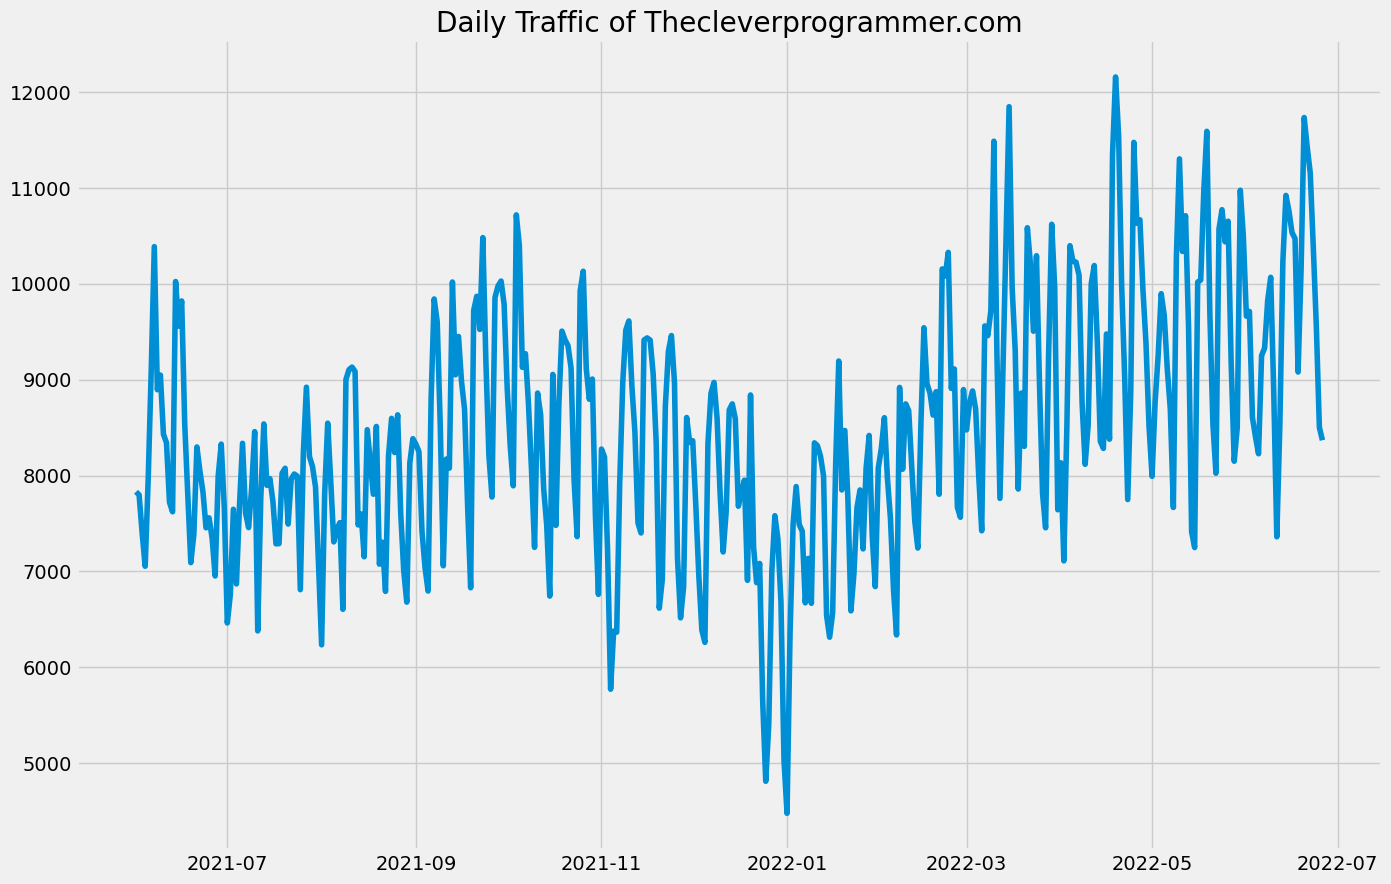

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 640x480 with 0 Axes>

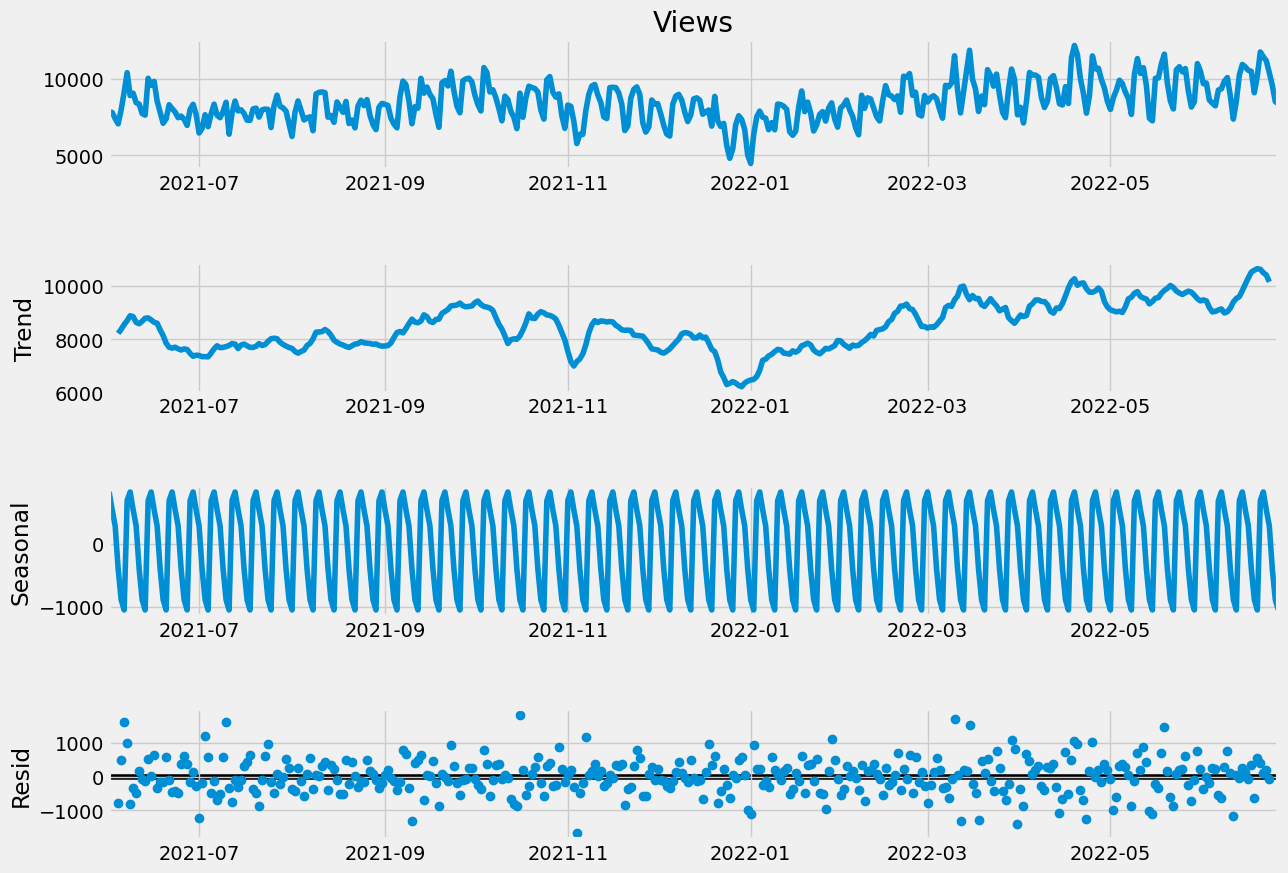

In [16]:
result = seasonal_decompose(data["Views"], 
                            model='additive')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

#### created an autocorrelation plot to figure out p value

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

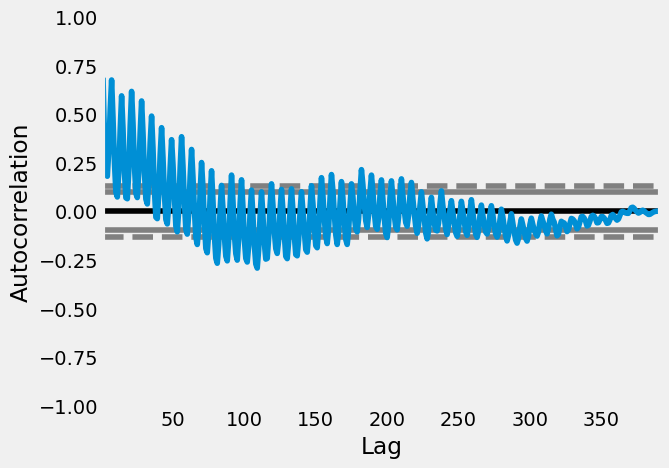

In [17]:
pd.plotting.autocorrelation_plot(data["Views"])

#### p value of 5 is observed 

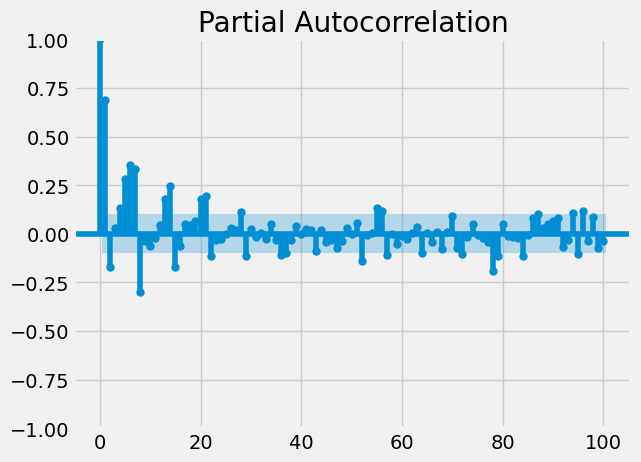

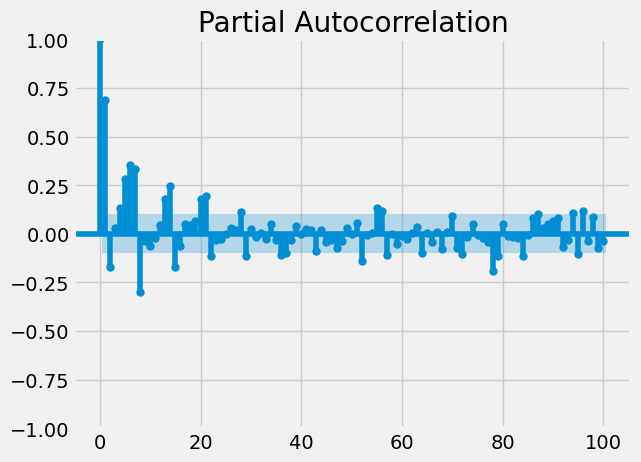

In [19]:
plot_pacf(data["Views"], lags = 100)

#### q value is 2 

#### Training SARIMA model with the above p,d,q values

In [20]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\sgadi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sgadi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sgadi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sgadi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3098.982
Date:                            Wed, 29 Mar 2023   AIC                           6227.964
Time:                                    22:27:21   BIC                           6286.988
Sample:                                06-01-2021   HQIC                          6251.390
                                     - 06-26-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7747      0.132      5.878      0.000       0.516       1.033
ar.L2         -0.8016      0.136   

#### Predicting values for next 50 days

In [21]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

2022-06-27     9893.948252
2022-06-28    10806.700711
2022-06-29    10715.704164
2022-06-30     9820.263103
2022-07-01     8765.297863
2022-07-02     8238.925366
2022-07-03     8951.869384
2022-07-04     9730.422120
2022-07-05    10320.509312
2022-07-06    10582.068192
2022-07-07     9851.685202
2022-07-08     9310.476772
2022-07-09     8998.959241
2022-07-10     9090.011521
2022-07-11    10509.352438
2022-07-12    11002.419745
2022-07-13    10892.098183
2022-07-14    10033.129308
2022-07-15     9379.788208
2022-07-16     8607.433961
2022-07-17     9205.421163
2022-07-18    10373.212307
2022-07-19    10655.420517
2022-07-20    10803.106709
2022-07-21    10220.246231
2022-07-22     9374.235338
2022-07-23     8960.527001
2022-07-24     9176.489644
2022-07-25     9959.007981
2022-07-26    10288.981094
2022-07-27    10728.070994
2022-07-28     9864.859020
2022-07-29     9470.999920
2022-07-30     8975.962677
2022-07-31     8890.276122
2022-08-01    10223.660677
2022-08-02    10908.900904
2

<AxesSubplot:xlabel='Date'>

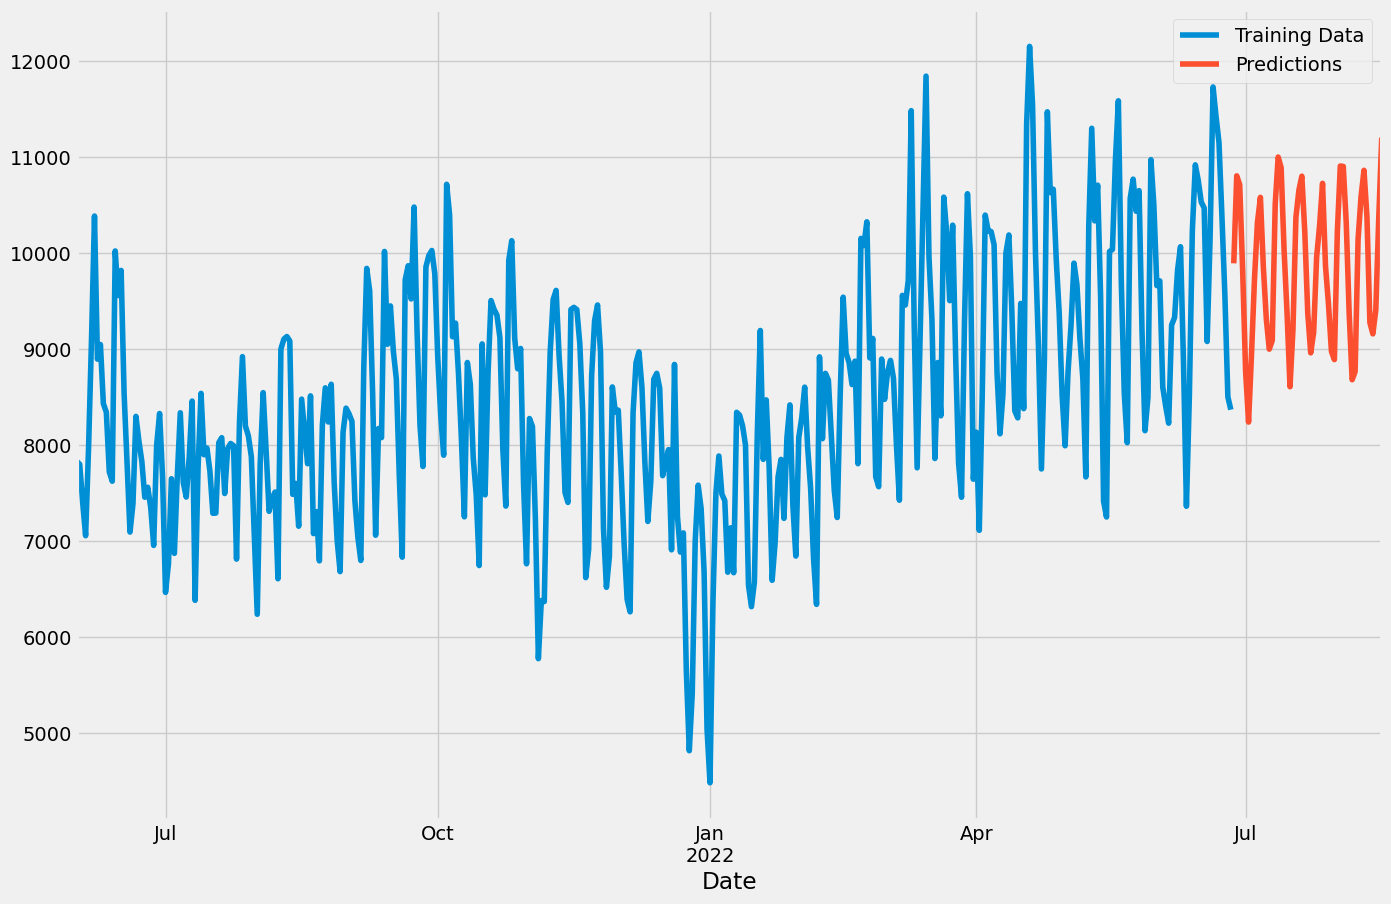

In [23]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

#### Here, we can see website traffic predictions made for the next 50 days starting 26th June